In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

Data Collection and Analysis

PIMA Diabetes Dataset 

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/sample_data/diabetes.csv') 

In [3]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [5]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [6]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [7]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [8]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [10]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [11]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [12]:
X = standardized_data
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


Training the Model

In [14]:
classifier = svm.SVC(kernel='linear')

In [15]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [16]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [17]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7821229050279329


In [19]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [20]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7748917748917749


Making a Diabetes Predictive System

In [21]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Data Visualization 

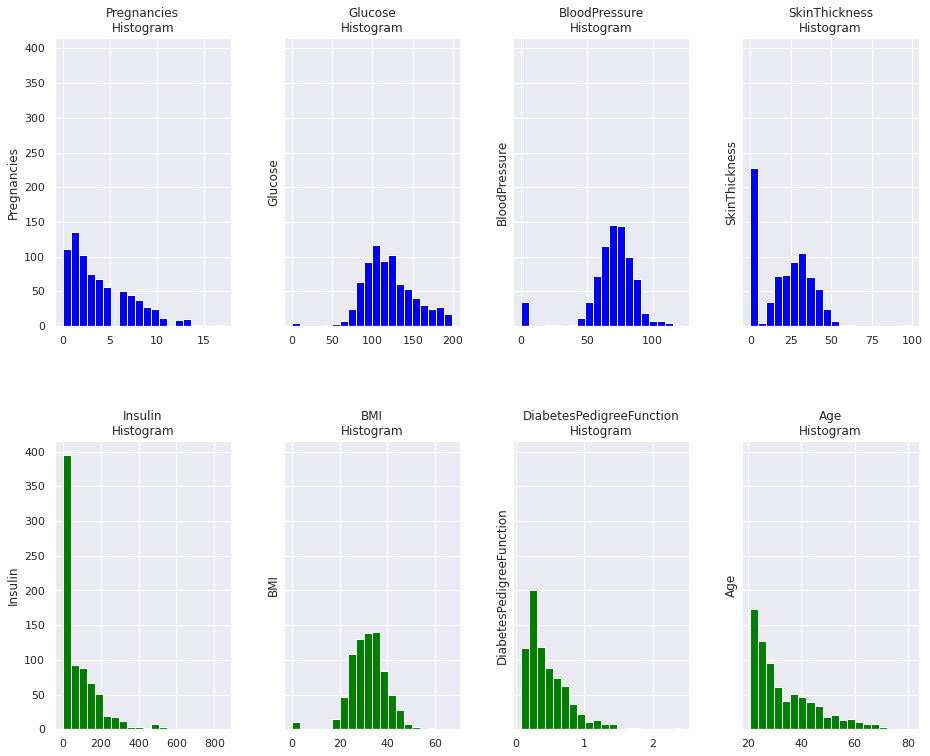

In [22]:
# Distribution of Each Feature: Histogram

colnames=diabetes_dataset.columns 
fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(15,12), sharey=True)
for i in range(4):
    x = colnames[i]
    ax[0,i].hist(diabetes_dataset[str(x)], color="blue", bins=20)
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nHistogram")

for i in range(4,8):
    x = colnames[i]
    ax[1,i-4].hist(diabetes_dataset[str(x)], color="green", bins=20)
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nHistogram")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)